In [46]:
# import packages
import pandas as pd # dataframes
import matplotlib.pyplot as plt # plotting data
import geobr
import matplotlib.pyplot as plt
states = geobr.read_state(year=2019)

## Brazil Corona Data

In [47]:
# import directly from GitHub
corona_df = pd.read_csv("https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv")

# change date column to datetime format
corona_df['date'] = pd.to_datetime(corona_df['date'])

# print all available columns
print(corona_df.columns)

# filter data for Brazil, and show only the specified columns
corona_df = corona_df.query("state != 'TOTAL'")[['date', 'state', 'newDeaths', 'newCases', 'totalCases', 'deaths', 'suspects', 'recovered', 'tests', 'vaccinated', 'vaccinated_second']]

# create new columns
corona_df['activeCases'] = corona_df['totalCases'] - corona_df['deaths'] - corona_df['recovered']
corona_df['newVaccinated'] = corona_df['vaccinated'].diff()
corona_df['newVaccinated_second'] = corona_df['vaccinated_second'].diff()

# display the dataframe
corona_df

Index(['epi_week', 'date', 'country', 'state', 'city', 'newDeaths', 'deaths',
       'newCases', 'totalCases', 'deathsMS', 'totalCasesMS',
       'deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants',
       'deaths_by_totalCases', 'recovered', 'suspects', 'tests',
       'tests_per_100k_inhabitants', 'vaccinated',
       'vaccinated_per_100_inhabitants', 'vaccinated_second',
       'vaccinated_second_per_100_inhabitants', 'vaccinated_single',
       'vaccinated_single_per_100_inhabitants', 'vaccinated_third',
       'vaccinated_third_per_100_inhabitants'],
      dtype='object')


,date,state,newDeaths,newCases,totalCases,deaths,suspects,recovered,tests,vaccinated,vaccinated_second,activeCases,newVaccinated,newVaccinated_second
0,2020-02-25,SP,0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-26,SP,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-27,SP,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2020-02-28,SP,0,1,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2020-02-29,SP,0,0,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29156,2023-01-17,RS,0,0,2933976,41673,10647.0,2146461.0,7749875.0,9837021.0,9384074.0,745842.0,9372325.0,9020872.0
29157,2023-01-17,SC,0,0,1968113,22615,205.0,1607144.0,2568392.0,6305426.0,5835424.0,338354.0,-3531595.0,-3548650.0
29158,2023-01-17,SE,0,0,359157,6496,445.0,313577.0,604183.0,2010555.0,1852716.0,39084.0,-4294871.0,-3982708.0
29159,2023-01-17,SP,0,0,6367148,177740,876238.0,4850000.0,19501783.0,43177708.0,40612464.0,1339408.0,41167153.0,38759748.0


In [48]:
group_corona_df = corona_df.groupby([corona_df['date'].dt.strftime('%y-%m'), "state"])[["newDeaths", "newCases"]].sum()
group_corona_df

newDeaths  newCases
date  state                     
20-02 SP             0         2
20-03 AC             0        42
      AL             1        18
      AM             3       175
      AP             0        10
...                ...       ...
23-01 RS           165     38405
      SC            32     11960
      SE            14       876
      SP           329     51815
      TO            12      3690

[946 rows x 2 columns]

### Analysis by month

In [49]:
month = "22-08"
corona_month = group_corona_df.xs(month, level="date").reset_index()
corona_month

,state,newDeaths,newCases
0,AC,9,5864
1,AL,46,2427
2,AM,59,7959
3,AP,9,1599
4,BA,287,25407
5,CE,151,20457
6,DF,6,6739
7,ES,95,11018
8,GO,288,53085
9,MA,47,8752


In [50]:
states["abbrev_state"] = states["abbrev_state"].str.lower()
corona_month["state"] = corona_month["state"].str.lower()
# join the databases
corona_states = states.merge(corona_month, how="left", left_on="abbrev_state", right_on="state")

c:\Python\Python396\lib\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
c:\Python\Python396\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
c:\Python\Python396\lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


(-76.24758052684999, -26.59070825415, -35.70232894755001, 7.222992030549992)

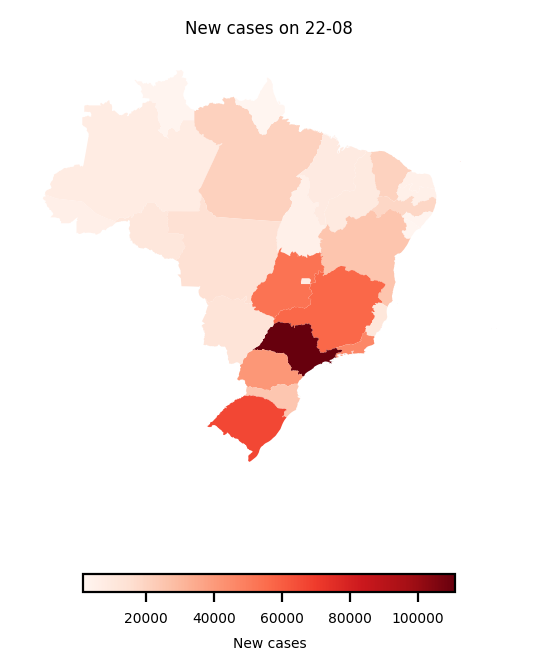

In [51]:
plt.rcParams.update({"font.size": 5})

fig, ax = plt.subplots(figsize=(4, 4), dpi=200)

corona_states.plot(
    column="newCases",
    cmap="Reds",
    legend=True,
    legend_kwds={
        "label": "New cases",
        "orientation": "horizontal",
        "shrink": 0.6,
    },
    ax=ax,
)

ax.set_title(f"New cases on {month}")
ax.axis("off")

### Analysis by state

In [52]:
state = "SP"
corona_state = group_corona_df.xs(state, level="state").reset_index()
corona_state

,date,newDeaths,newCases
0,20-02,0,2
1,20-03,136,2337
2,20-04,2239,26359
3,20-05,5240,81000
4,20-06,7148,171682
5,20-07,8234,260924
6,20-08,7017,262038
7,20-09,5608,181286
8,20-10,3689,130499
9,20-11,2784,125526


<AxesSubplot: xlabel='date'>

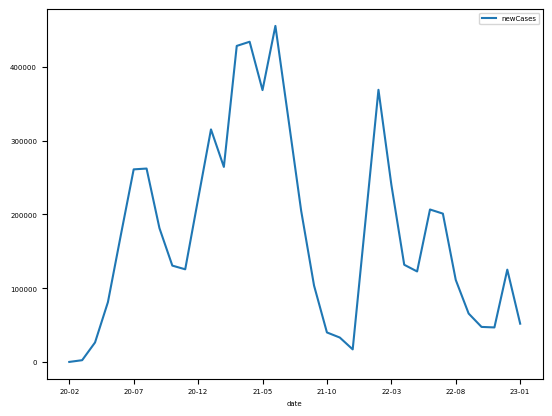

In [53]:
corona_state.plot("date","newCases")

## São Paulo Weather Data

In [55]:
sp_weather_df = pd.read_csv("Sao Paulo,Brazil 2020-02-25 to 2022-11-20.csv")

In [57]:
sp_weather_df

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Sao Paulo,Brazil",2020-02-25,29.0,19.5,23.1,31.2,19.5,23.5,19.6,81.7,...,23.0,9,NaN,2020-02-25T05:59:47,2020-02-25T18:39:20,0.02,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"SBMT,83779099999,83075099999,SBKP,SBSP,8372109..."
1,"Sao Paulo,Brazil",2020-02-26,24.8,19.2,22.2,24.8,19.2,22.2,20.2,88.5,...,19.3,8,NaN,2020-02-26T06:00:17,2020-02-26T18:38:30,0.04,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"SBMT,83779099999,83075099999,SBKP,SBSP,8372109..."
2,"Sao Paulo,Brazil",2020-02-27,21.0,16.0,18.0,21.0,16.0,18.0,15.7,86.8,...,18.9,8,NaN,2020-02-27T06:00:47,2020-02-27T18:37:39,0.06,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"SBMT,83779099999,83075099999,SBKP,SBSP,8372109..."
3,"Sao Paulo,Brazil",2020-02-28,19.6,17.0,18.2,19.6,17.0,18.2,15.6,85.0,...,19.1,7,NaN,2020-02-28T06:01:17,2020-02-28T18:36:47,0.10,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"SBMT,83779099999,83075099999,SBKP,SBSP,8372109..."
4,"Sao Paulo,Brazil",2020-02-29,23.6,18.9,20.6,23.6,18.9,20.6,18.1,85.9,...,13.3,5,NaN,2020-02-29T06:01:46,2020-02-29T18:35:55,0.14,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"SBMT,83779099999,83075099999,SBKP,SBSP,8372109..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,"Sao Paulo,Brazil",2022-11-16,23.9,16.6,19.7,23.9,16.6,19.7,11.5,59.6,...,15.2,8,10.0,2022-11-16T05:13:27,2022-11-16T18:29:38,0.75,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"SBMT,83779099999,83075099999,SBKP,83781099999,..."
996,"Sao Paulo,Brazil",2022-11-17,24.1,14.6,19.0,24.1,14.6,19.0,10.2,58.9,...,20.9,7,10.0,2022-11-17T05:13:09,2022-11-17T18:30:19,0.80,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"SBMT,83779099999,83075099999,SBKP,83781099999,..."
997,"Sao Paulo,Brazil",2022-11-18,22.6,15.1,18.4,22.6,15.1,18.4,12.4,69.5,...,21.8,8,10.0,2022-11-18T05:12:53,2022-11-18T18:31:01,0.85,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"SBMT,83779099999,83075099999,SBKP,83781099999,..."
998,"Sao Paulo,Brazil",2022-11-19,25.2,15.1,18.9,25.2,15.1,18.9,13.5,71.7,...,18.8,7,10.0,2022-11-19T05:12:38,2022-11-19T18:31:42,0.89,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"SBMT,83779099999,83075099999,SBKP,SBSP,F7461,8..."
